In [1]:
# Core
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Increase default plot size
from pylab import rcParams
rcParams['figure.figsize'] = (5, 4)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#load datasets
train_df = pd.read_csv('./titanic-dataset/train.csv')
test_df = pd.read_csv('./titanic-dataset/test.csv')

print("Shape of train dataset: ", train_df.shape)
print("Shape of test dataset: ", test_df.shape)

Shape of train dataset:  (891, 12)
Shape of test dataset:  (418, 11)


In [3]:
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#count total NaN in train dataset
totalna = train_df.isnull().sum().sort_values(ascending=False)
percentagena = totalna/train_df.shape[0]*100

total_percent_df = pd.concat([totalna, percentagena], axis=1)
total_percent_df.columns = ["total na", "percentage na"]

total_percent_df

,total na,percentage na
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [6]:
#count total NaN in test dataset
totalna = test_df.isnull().sum().sort_values(ascending=False)
percentagena = totalna/test_df.shape[0]*100

total_percent_df = pd.concat([totalna, percentagena], axis=1)
total_percent_df.columns = ["total na", "percentage na"]

total_percent_df

,total na,percentage na
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [7]:
#inspect missing value in train_df's Embarked
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Then for a 1st Passenger class with Cabin B: 


C    3
S    2
Name: Embarked, dtype: int64

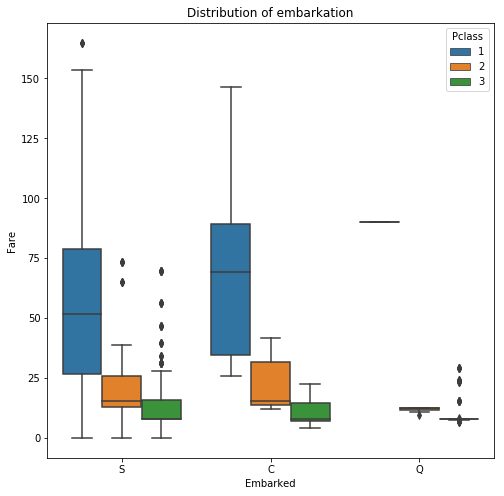

In [8]:
#look at distribution, and see which Embarked group matches the two ladies
feats = ['Pclass', 'Embarked', 'Fare']
dist_df = pd.concat([train_df[feats], test_df[feats]], axis=0)

plt.subplots(figsize=(8,8))
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=dist_df[dist_df.Fare<200]);
plt.title("Distribution of embarkation")

print("Then for a 1st Passenger class with Cabin B: ")
train_df[(train_df.Pclass==1)&(train_df.Cabin.str[0]=='B')&(train_df.Fare>70)&(train_df.Fare<85)].Embarked.value_counts()

In [9]:
#the ladies are more likely to embark from Cheburg (C), hence fillna() with C
train_df.Embarked.fillna('C', inplace=True);
print("Check if fillna works, number of null in Embarked:", train_df.Embarked.isnull().sum())

Check if fillna works, number of null in Embarked: 0


In [10]:
#inspect mising value in test dataset's Fare
test_df[test_df.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [11]:
#looking at the above boxplot distribution, the sir is morelikely to pay:
mean = train_df[(train_df.Embarked=='S')&(train_df.Pclass==3)].Fare.mean()
print("Mean Fare for 3rd SocioClass coming from SouthHampton: USD", mean)

#fillna
test_df.Fare.fillna(mean, inplace=True)
print("Check if fillna works, number of null in Fare:", test_df.Fare.isnull().sum())

Mean Fare for 3rd SocioClass coming from SouthHampton: USD 14.644083002832863
Check if fillna works, number of null in Fare: 0


In [12]:
#let's label the Cabin (eg. B28) with it's first letter, drop the number code behind
train_df.Cabin = train_df.Cabin.str[0]
test_df.Cabin = test_df.Cabin.str[0]

#handle missing Cabin
train_df.Cabin.fillna('N', inplace=True)
test_df.Cabin.fillna('N', inplace=True)

#display 
pd.concat([train_df.Cabin.value_counts(), test_df.Cabin.value_counts()], axis=1)

,Cabin,Cabin
A,15,7.0
B,47,18.0
C,59,35.0
D,33,13.0
E,32,9.0
F,13,8.0
G,4,1.0
N,687,327.0
T,1,NaN


In [13]:
#missing Age
print("Train age percentage missing value:", train_df.Age.isnull().sum()/train_df.shape[0]*100)
print("Test age percentage missing value:", test_df.Age.isnull().sum()/test_df.shape[0]*100)

Train age percentage missing value: 19.865319865319865
Test age percentage missing value: 20.574162679425836


Data Visualisation

In [14]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

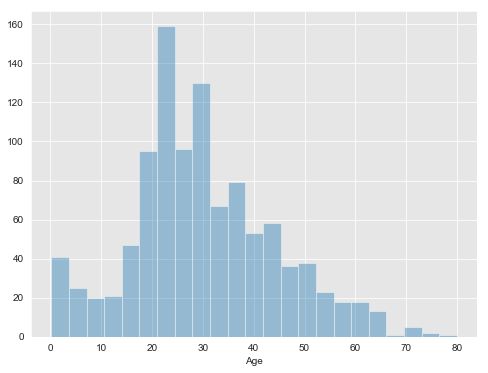

In [15]:
#histogram of age distribution
plt.subplots(figsize=(8,6))
sns.distplot(pd.concat([train_df, test_df]).Age.dropna(), kde=False, hist=True);

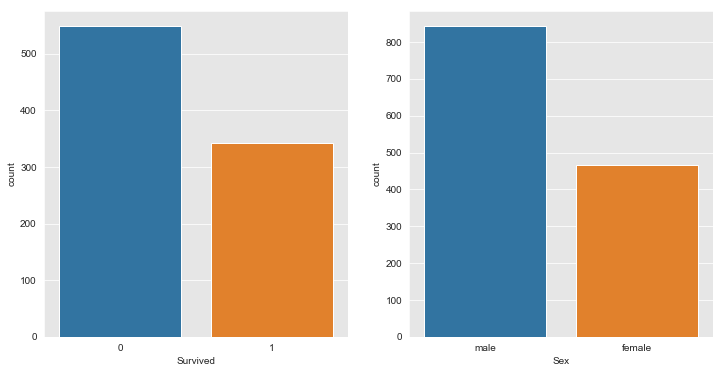

In [16]:
#countplot Survived and Sex ratio
_, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = sns.countplot(x='Survived', data=train_df, ax=axes[0])
ax = sns.countplot(x='Sex', data=pd.concat([train_df,test_df]), ax=axes[1])

Text(0.5, 1.0, 'Survival Rate over Gender')

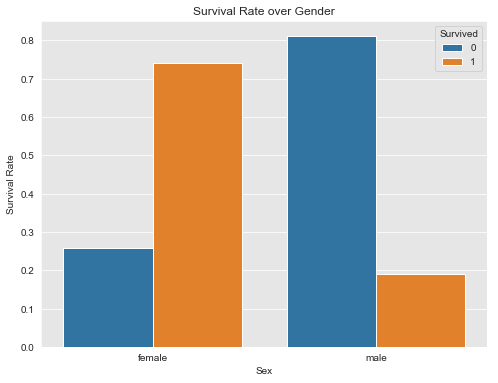

In [17]:
#Barplot Sex
x, y, hue = 'Sex', 'Survival Rate', 'Survived'
sex_df = (train_df[hue]
          .groupby(train_df[x])
          .value_counts(normalize=True)
          .rename(y)
          .reset_index())

#plotting
plt.subplots(figsize=(8,6))
ax = sns.barplot(x=x, y=y, hue=hue, data=sex_df)
plt.title("Survival Rate over Gender")

In [18]:
# define Barplotting function
def barplot_titanic(x, y, hue, data, figsize=(8,6), title="Title", pal=None):
    sub_df = (data[hue]
                 .groupby(data[x])
                 .value_counts(normalize=True)
                 .rename(y)
                 .reset_index())
    plt.subplots(figsize=figsize)
    ax = sns.barplot(x=x, y=y, hue=hue, data=sub_df, palette=pal)
    plt.title(title)

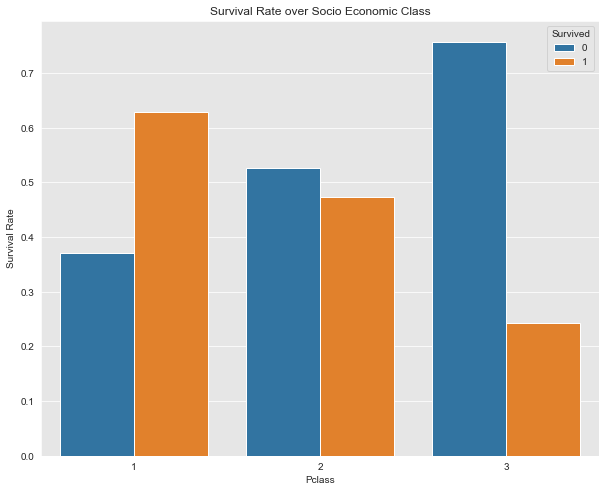

In [19]:
#Barplot PClass
x, y, hue = 'Pclass', 'Survival Rate', 'Survived'
barplot_titanic(x, y, hue, train_df, figsize=(10,8), title='Survival Rate over Socio Economic Class')

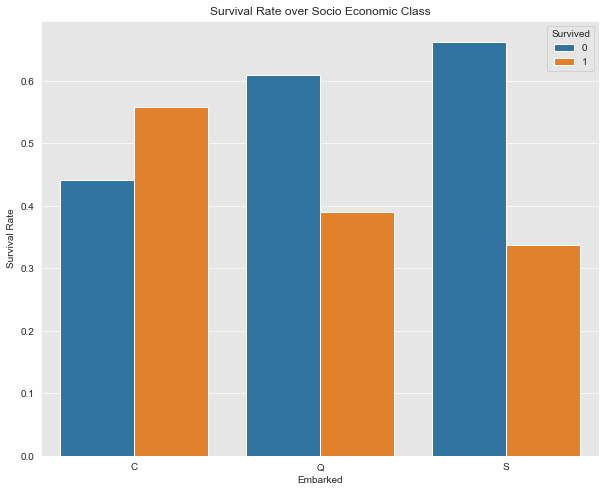

In [20]:
#Barplot PClass
x, y, hue = 'Embarked', 'Survival Rate', 'Survived'
barplot_titanic(x, y, hue, train_df, figsize=(10,8), title='Survival Rate over Socio Economic Class', pal=None)

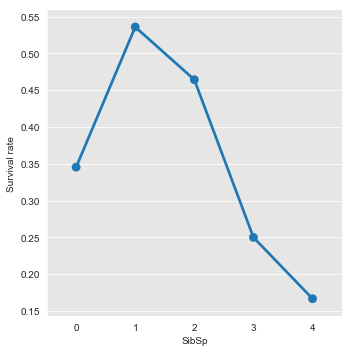

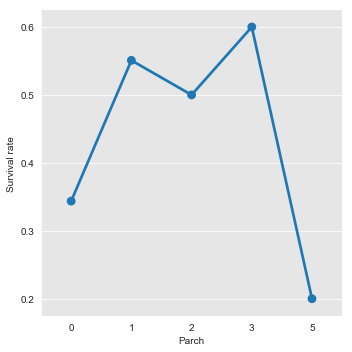

In [21]:
x1, x2, y, group = 'SibSp', 'Parch', 'Survival rate', 'Survived'

#Factorplot
sibsp_df = (train_df[group]
            .groupby(train_df[x1])
            .value_counts(normalize=True)
            .rename(y)
            .reset_index())
parch_df = (train_df[group]
            .groupby(train_df[x2])
            .value_counts(normalize=True)
            .rename(y)
            .reset_index())

#plotting
sns.factorplot(x=x1, y=y, data=sibsp_df[sibsp_df.Survived==1]);
sns.factorplot(x=x2, y=y, data=parch_df[parch_df.Survived==1]);

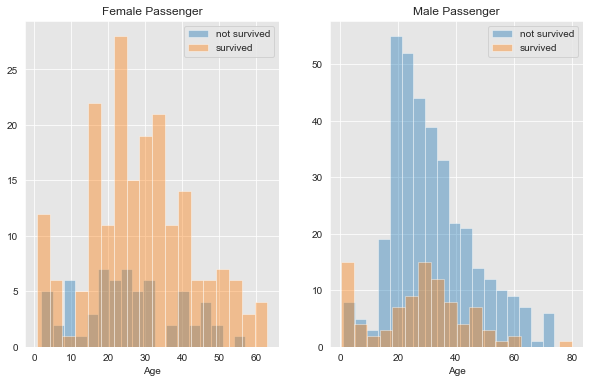

In [22]:
#Kernel Density plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

female_df = train_df[train_df.Sex=='female']
male_df = train_df[train_df.Sex=='male']

#plotting female
ax = sns.distplot(female_df[female_df.Survived==0].Age.dropna(), bins=18, label='not survived', ax=axes[0], kde=False) #female
ax = sns.distplot(female_df[female_df.Survived==1].Age.dropna(), bins=18, label='survived', ax=axes[0], kde=False)#female
ax.set_title('Female Passenger')
ax.legend();

#plotting male
ax = sns.distplot(male_df[male_df.Survived==0].Age.dropna(), bins=18, label='not survived', ax=axes[1], kde=False) #female
ax = sns.distplot(male_df[male_df.Survived==1].Age.dropna(), bins=18, label='survived', ax=axes[1], kde=False)#female
ax.set_title('Male Passenger')
ax.legend();

<Figure size 864x864 with 0 Axes>

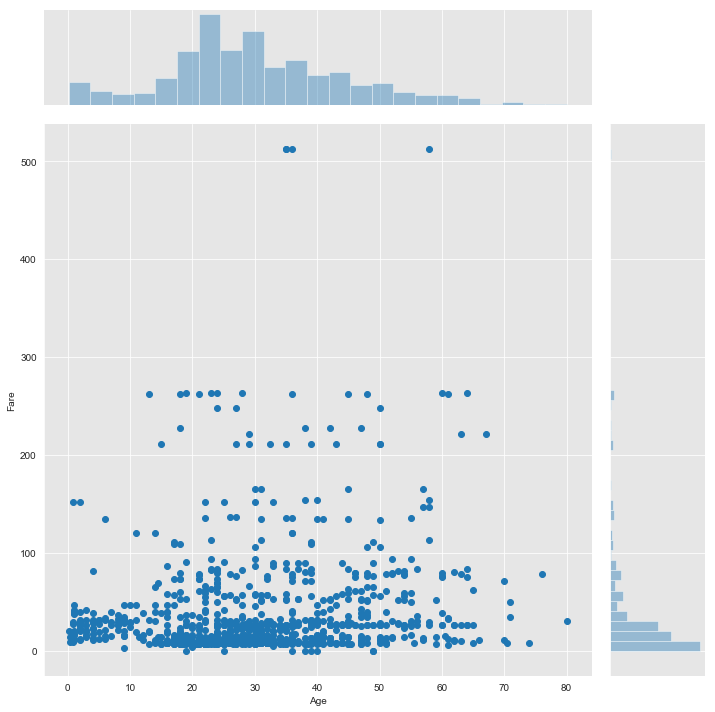

In [23]:
#Joint plot
fig = plt.figure(figsize=(12,12))
ax = sns.jointplot(x='Age', y='Fare', data=pd.concat([train_df, test_df]), size=10)

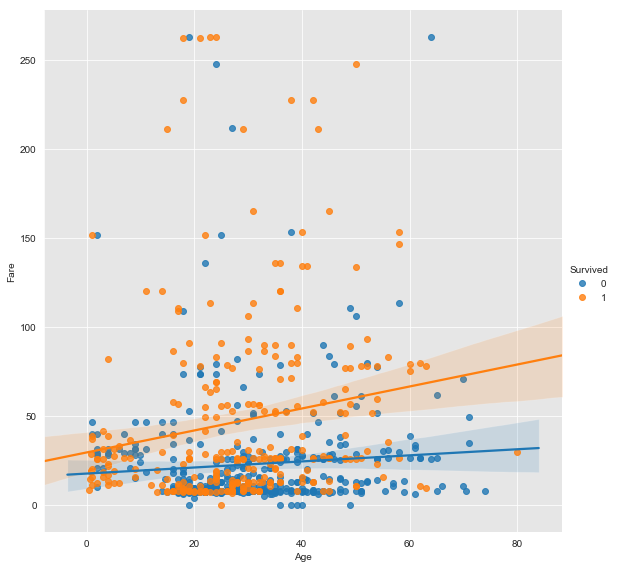

In [24]:
#lmplot
ax = sns.lmplot(x='Age', y='Fare', hue='Survived', data=train_df[train_df.Fare<280], size=8)

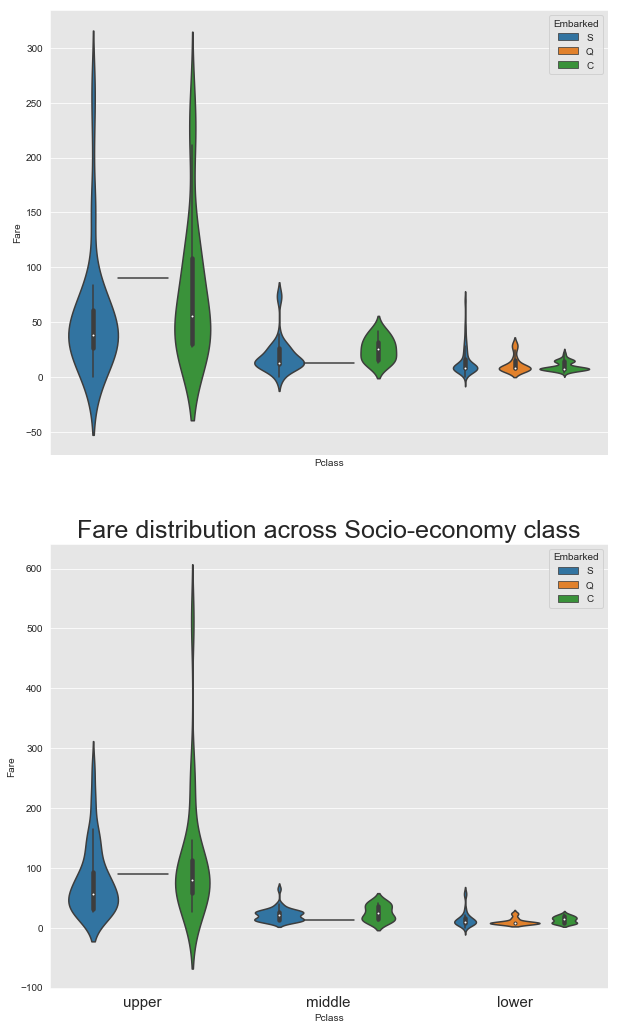

In [25]:
#Violin Plot over Fare
_, axes = plt.subplots(2, 1, figsize=(10,18), sharex=True)

sns.violinplot(x='Pclass', y='Fare', hue='Embarked', hue_order=['S', 'Q', 'C'], data=train_df[train_df.Survived==0], ax=axes[0])
plt.xticks([0,1,2], ['upper', 'middle', 'lower'], fontsize=15)
plt.title('Fare distribution across Socio-economy class', fontsize=25);

sns.violinplot(x='Pclass', y='Fare', hue='Embarked', hue_order=['S', 'Q', 'C'], data=train_df[train_df.Survived==1], ax=axes[1])
plt.xticks([0,1,2], ['upper', 'middle', 'lower'], fontsize=15)
plt.title('Fare distribution across Socio-economy class', fontsize=25);

In [ ]:
#Violin Plot over Age
_, axes = plt.subplots(2, 1, figsize=(10,18), sharex=True)

sns.violinplot(x='Pclass', y='Age', hue='Embarked', hue_order=['S', 'Q', 'C'], data=train_df[train_df.Survived==0], ax=axes[0])
plt.xticks([0,1,2], ['upper', 'middle', 'lower'], fontsize=15)
plt.title('Fare distribution across Socio-economy class', fontsize=25);

sns.violinplot(x='Pclass', y='Age', hue='Embarked', hue_order=['S', 'Q', 'C'], data=train_df[train_df.Survived==1], ax=axes[1])
plt.xticks([0,1,2], ['upper', 'middle', 'lower'], fontsize=15)
plt.title('Fare distribution across Socio-economy class', fontsize=25);

In [ ]:
#Boxplot
x, y, col, row = 'Survived', 'Age', 'Pclass', 'Embarked'
sns.factorplot(x=x, y=y, col=col, row=row, data=train_df, kind='box', size=5, aspect=.8);

In [ ]:
#Boxplot
x, y, col, row = 'Survived', 'Fare', 'Pclass', 'Embarked'
sns.factorplot(x=x, y=y, col=col, row=row, data=train_df[train_df.Fare<280], kind='box', size=5, aspect=.8);

In [ ]:
#Correlation
